In [17]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Zomato data .csv')
df.head()








Saving Zomato data .csv to Zomato data  (15).csv


name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet

In [20]:
#convert the data type of column- rate
# Function to clean and convert rate column
def handleRate(value):
    try:
        value = str(value).split('/')[0].strip()
        return float(value)
    except:
        return None  # or np.nan if you are using numpy

# Apply the function
df['rate'] = df['rate'].apply(handleRate)

# Show result
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [25]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates','listed_in(type)' : 'Type' }, inplace = True)
df.head()

name online_order book_table  rate  votes  Cost2plates  \
0                  Jalsa          Yes        Yes   4.1    775          800   
1         Spice Elephant          Yes         No   4.1    787          800   
2        San Churro Cafe          Yes         No   3.8    918          800   
3  Addhuri Udupi Bhojana           No         No   3.7     88          300   
4          Grand Village           No         No   3.8    166          600   

     Type  
0  Buffet  
1  Buffet  
2  Buffet  
3  Buffet  
4  Buffet

In [30]:
df['Type'].value_counts()

Type
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [29]:
#to check how many have online order facility
plt.figure(figsize = (6,6))
sns.countplot(df['online_order'], palette = 'inferno')

<ipython-input-29-3533392751>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['online_order'], palette = 'inferno')


<Axes: xlabel='count', ylabel='online_order'>

In [31]:
#how many restraunts have book table facility
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')

<ipython-input-31-3596443776>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['book_table'], palette = 'rainbow')


<Axes: xlabel='count', ylabel='book_table'>

In [33]:
#online order vs rate
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y= 'rate',data = df)

<Axes: xlabel='online_order', ylabel='rate'>

<Axes: xlabel='book_table', ylabel='rate'>

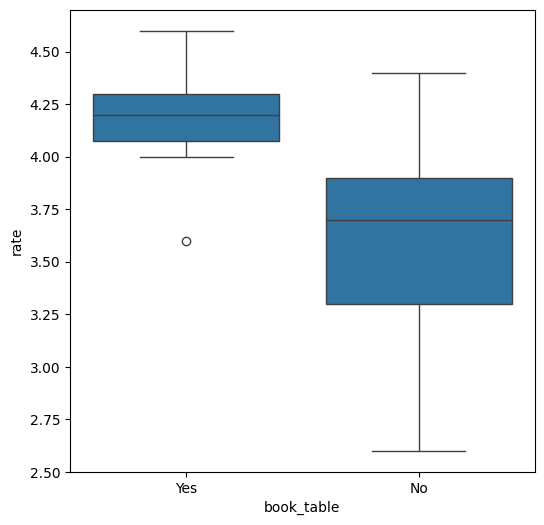

In [34]:
#book table vs rate
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y= 'rate',data = df)

<ipython-input-36-2893237848>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y= 'rate',data = df, palette = 'inferno')


<Axes: xlabel='Type', ylabel='rate'>

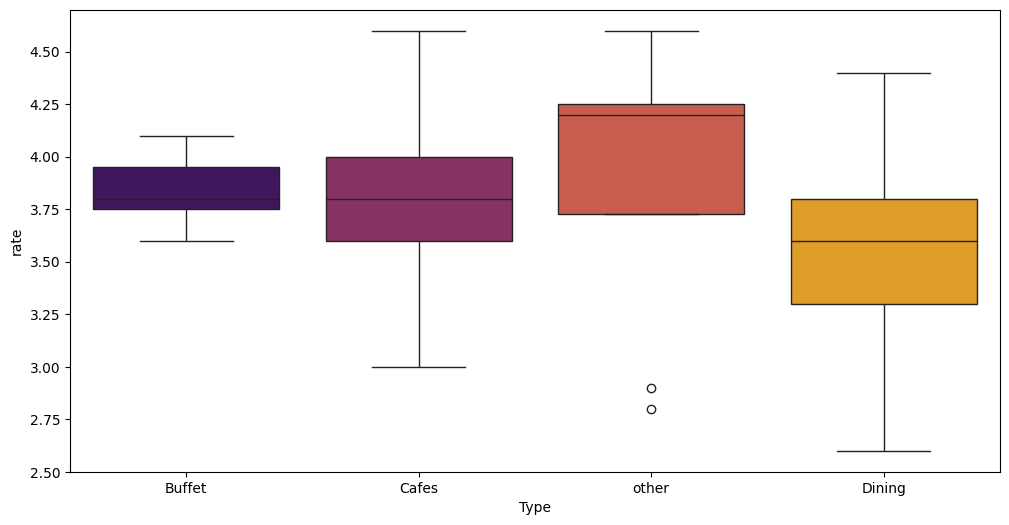

In [36]:
#types of restraunt vs  rating
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Type', y= 'rate',data = df, palette = 'inferno')